There are two spectras that are relevant from this experiment.

The first one is of the thick Havar stopper foil of thickness 3.2 $\mu$m.

The energy calibration is calculated from EnergyCalibrationv04.ods. The equation of the energy calibration is $f(x)=0.00536x+1.44$

In the below cell we have done the energy calibration and the peak fitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

fp = 'Au_10B_foil.mpa'
spectrum = pd.read_csv(fp, sep=',', skiprows=221)


# Create the dictionary with old and new names
new_names = {'0': 'counts'}
# Rename the columns
spectrum = spectrum.rename(columns=new_names)

spectrum.shape


def energy(channelno):
    return 0.00536*channelno+1.44

spectrum["energy"]=energy(spectrum.index)

spectrum.head()

def gauss_function(x, a, x0, sigma):
    # Where a is the area of the Gaussian peak, x0 is the mean/centroid and sigma is the standard deviation. 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# p0 = [1, mean, sigma]
popt, pcov = curve_fit(gauss_function, spectrum["energy"], spectrum["counts"], p0 = [1, 5, 0.4])
# popt gives us the optimised values of a, x0, sigma

spectrum.plot("energy","counts")
ax = plt.gca()
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Counts")
ax.set(xlim=(0, 6))
# ax.legend().remove()
# plt.plot(spectrum["energy"], gauss_function(spectrum["energy"], *popt), label='fit')

print(popt)



[133.89943809   3.1289099    0.22407763]


Now we have to do the convolution procedure.

[ 0.04679068  0.04765196  0.04850265  0.04934173  0.05016808  0.05098052
  0.05349913  0.05445282  0.05540174  0.05806622  0.05917541  0.06028964
  0.06312941  0.06442398  0.07261918  0.08496346  0.09152658  0.09858216
  0.1113243   0.13030245  0.14061382  0.1637098   0.18190177  0.2032318
  0.23655678  0.28816926  0.33741869  0.39595453  0.46970558  0.55139197
  0.64155883  0.75626228  0.91141173  1.07968061  1.26185693  1.45013458
  1.65995052  1.87381053  2.10679562  2.38405379  2.64710089  2.9140448
  3.22200468  3.5067669   3.81628968  4.13449808  4.45392441  4.79554636
  5.1342064   5.48860513  5.85175357  6.21933903  6.5986228   6.98896471
  7.38446315  7.788928    8.20827272  8.626628    9.05062489  9.47899763
  9.91039341 10.34337805 10.778164   11.20990556 11.63852986 12.06235402
 12.47963192 12.88866731 13.28766653 13.67486129 14.0484926  14.40682383
 14.74815399 15.07083105 15.37326512 15.65394147 15.91143306 16.14441264
 16.35166403 16.53209272 16.68473547 16.80876882 16.9

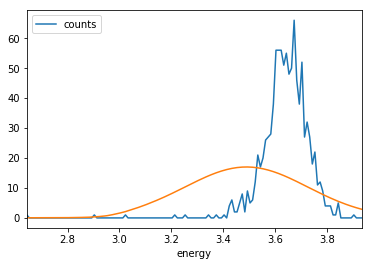

In [2]:
from scipy import signal

fp = 'Hist10BHavar3.2um.txt'
SrimHist10BHavar3p2um = pd.read_csv(fp, delim_whitespace=True, header=None)

SrimHist10BHavar3p2um.columns = ['energy','counts']

# print(SrimHist10BHavar3p2um.shape)

SrimHist10BHavar3p2um['energy']=SrimHist10BHavar3p2um['energy']/1e6

# # # SrimHist10BHavar3p2um.plot("energy","counts")

sig=SrimHist10BHavar3p2um['counts']

win=gauss_function(SrimHist10BHavar3p2um['energy'], 133.89943809,3.1289099,0.22407763)

filtered = signal.convolve(sig, win, mode='same') / sum(win)

# # print(win.shape)

print(filtered)

SrimHist10BHavar3p2um.plot("energy","counts")
plt.plot(SrimHist10BHavar3p2um['energy'],filtered)



Below from Kenza

998 886.0515851486874
130 130 136


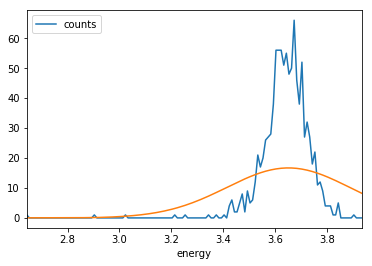

In [3]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

fp = 'Hist10BHavar3.2um.txt'
SrimHist10BHavar3p2um = pd.read_csv(fp, delim_whitespace=True, 
header=None)

SrimHist10BHavar3p2um.columns = ['energy','counts']

# print(SrimHist10BHavar3p2um.shape)

SrimHist10BHavar3p2um['energy']=SrimHist10BHavar3p2um['energy']/1e6

# # # SrimHist10BHavar3p2um.plot("energy","counts")

## create gaussian kernel ##
sigma=0.2240776
energy=SrimHist10BHavar3p2um['energy']
dx=(max(energy)-min(energy))/len(energy)
gaussian_x=np.arange(-3*sigma, 3*sigma, dx)
gaussian = np.exp(-(gaussian_x/sigma)**2/2)

sig=SrimHist10BHavar3p2um['counts']

#win=gauss_function(SrimHist10BHavar3p2um['energy'], 133.89943809,3.1289099,0.22407763)

filtered = signal.convolve(sig, gaussian, mode='same')/sum(gaussian)
print(sum(sig), sum(filtered))

# # print(win.shape)

#print(filtered)
print(len(energy), len(filtered), len(gaussian))
SrimHist10BHavar3p2um.plot("energy","counts")
plt.plot(energy,filtered)
plt.show()

The second one is for a thinner Havar stopping foil of thickness 2.4 𝜇m (first peak). The second peak is the case where there is no stopping foil, so we get the actual detector resolution. The fitting of the second peak gives us the parameters we need for the convolution step. 

[90.15418955 10.65881935  0.20399069]
[255.42264589   6.31545777  -0.27431585]


(8190, 2)

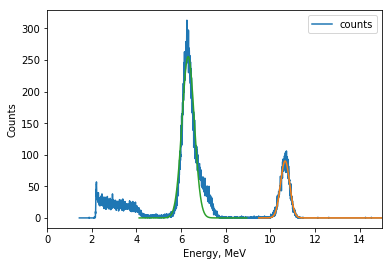

In [7]:
fp = 'Au_10B_foil_thin.mpa'
exp_data = pd.read_csv(fp, sep=',', skiprows=221)

# Create the dictionary with old and new names
new_names = {'0': 'counts'}
# Rename the columns
exp_data = exp_data.rename(columns=new_names)

#Have to repeat function definitions in each cell!!
def energy(channelno):
    return 0.00536*channelno+1.44

exp_data["energy"]= energy(exp_data.index)

#Making cuts in the data
x = exp_data["energy"][1500:8190]

y = exp_data["counts"][1500:8190]

x1 = exp_data["energy"][500:1400]

y1 = exp_data["counts"][500:1400]


def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# p0 = [1, mean, sigma]
popt, pcov = curve_fit(gauss_function, x, y, p0 = [1, 12, 0.4])

popt1, pcov1 = curve_fit(gauss_function, x1, y1, p0 = [1, 6, 0.4])

exp_data.plot("energy","counts")
ax = plt.gca()
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Counts")
ax.set(xlim=(0, 15))
#ax.legend().remove()
plt.plot(x, gauss_function(x, *popt), label='fit')

plt.plot(x1, gauss_function(x1, *popt1), label='fit1')


print(popt)
print(popt1)



# exp_data.head()
exp_data.shape
# exp_data.index

In [5]:
#  exp_data["energy"][1000:8190]
exp_data["counts"][1000:8190] 

1000    78
1001    67
1002    79
1003    85
1004    86
1005    86
1006    62
1007    74
1008    79
1009    61
1010    80
1011    71
1012    69
1013    68
1014    64
1015    61
1016    72
1017    76
1018    60
1019    59
1020    62
1021    51
1022    50
1023    56
1024    54
1025    61
1026    54
1027    48
1028    50
1029    52
        ..
8160     0
8161     0
8162     0
8163     0
8164     0
8165     0
8166     0
8167     0
8168     0
8169     0
8170     0
8171     0
8172     0
8173     0
8174     0
8175     0
8176     0
8177     0
8178     0
8179     0
8180     0
8181     0
8182     0
8183     0
8184     0
8185     0
8186     0
8187     0
8188     0
8189     1
Name: counts, Length: 7190, dtype: int64

Now we have to do the convolution procedure.

997 747.6416665783788
500 500 165


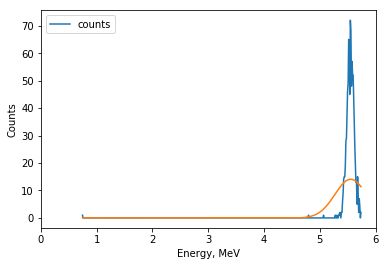

In [6]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

fp = 'Hist10BHavar2.4um.txt'
sim_data = pd.read_csv(fp, delim_whitespace=True, header=None)

sim_data.columns = ['energy','counts']

sim_data.head()

sim_data['energy']=sim_data['energy']/1e6

# sim_data.plot("energy","counts")

## create gaussian kernel ##
sigma=0.27432108
energy=sim_data['energy']
dx=(max(energy)-min(energy))/len(energy)
gaussian_x=np.arange(-3*sigma, 3*sigma, dx)
gaussian = np.exp(-(gaussian_x/sigma)**2/2)

sig=sim_data['counts']


filtered = signal.convolve(sig, gaussian, mode='same')/sum(gaussian)
print(sum(sig), sum(filtered))

print(len(energy), len(filtered), len(gaussian))
sim_data.plot("energy","counts")
ax = plt.gca()
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Counts")
ax.set(xlim=(0, 6))
plt.plot(energy,filtered)
plt.show()